# libs + loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

         ppm
year        
1960  316.91
1961  317.64
1962  318.45
1963  318.99
1964  319.62
...      ...
2017  406.76
2018  408.72
2019  411.66
2020  414.24
2021  416.45

[62 rows x 1 columns]


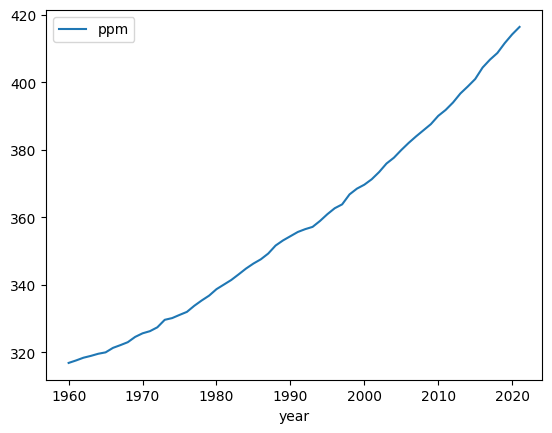

In [2]:
df = pd.read_csv('data.csv')
df.columns=["year","ppm"]

df.set_index('year', inplace=True)
df.plot()
print(df)

# arima

Bibiliography:

https://www.kaggle.com/code/vijaikm/co2-emission-forecast-with-python-seasonal-arima/notebook



Methods to transform non-stationary data to stationary:
- Aggregation: Taking average for time period
- Smoothing: Taking rolling averages
- Polynomial Fitting: Fitting a regression model

In [3]:
def adfuller_test(ppm):
    result = adfuller(ppm)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value, label in zip(result,labels):
        print(f'{label}: {value}' )

    print('Stationary' if result[1] <= 0.05 else 'Non-stationary')

adfuller_test(df['ppm'])

ADF Test Statistic: 5.506786113910213
p-value: 1.0
#Lags Used: 2
Number of Observations: 59
Non-stationary


In [4]:
# Differencing
ppm = df['ppm']

first_difference = ppm - ppm.shift(1)
pd.TestStationaryPlot(first_difference.dropna(inplace=False))

AttributeError: module 'pandas' has no attribute 'TestStationaryPlot'

In [ ]:
df['Ppm First Difference'] = df['ppm'] - df['ppm'].shift(1)
df['Seasonal First Difference']=df['ppm']-df['ppm'].shift(12)
df

In [ ]:
adfuller_test(df['Seasonal First Difference'].dropna())

In [ ]:
df['Seasonal First Difference'].plot()

In [ ]:
autocorrelation_plot(df['ppm'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['ppm'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['ppm'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=50,dynamic=True)
df[['ppm','forecast']].plot(figsize=(12,8))

In [ ]:
future_dates=[2021+ x for x in range(30)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 50, dynamic= True)
print(future_df)
future_df[['ppm', 'forecast']].plot(figsize=(12, 8))